In [33]:
# Libraries

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, matthews_corrcoef, classification_report
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve




In [8]:
synthetic_train_data = pd.read_csv('train.csv')
len(synthetic_train_data)

165034

In [3]:

# Label encoding for text data:
encoder = LabelEncoder()
categorical_features_train = synthetic_train_data.select_dtypes(include = 'object').columns
print("Categorical features: ", categorical_features_train)
for feature in categorical_features_train:
    synthetic_train_data[feature] = encoder.fit_transform(synthetic_train_data[feature])

# MinMax Scaler for credit score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
synthetic_train_data['CreditScore'] = scaler.fit_transform(synthetic_train_data[['CreditScore']])

# Robust Scaler for Balance
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
synthetic_train_data['Balance'] = scaler.fit_transform(synthetic_train_data[['Balance']])

# MinMax Scaler for Estimated Salary
scaler = MinMaxScaler()
synthetic_train_data['EstimatedSalary'] = scaler.fit_transform(synthetic_train_data[['EstimatedSalary']])

# Age / 100
synthetic_train_data['Age'] = synthetic_train_data['Age'] / 100

print(synthetic_train_data.columns.tolist())
synthetic_train_data.drop("Surname", axis=1, inplace=True)
synthetic_train_data.drop("CustomerId", axis=1, inplace=True)

#synthetic_train_data.drop("RowNumber", axis=1, inplace=True)
synthetic_train_data.dropna(inplace=True)

X = synthetic_train_data.drop('Exited', axis=1)
y = synthetic_train_data['Exited']

Categorical features:  Index(['Surname', 'Geography', 'Gender'], dtype='object')
['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.860544732935438


In [11]:
probabilities = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, probabilities)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

# Print the metrics
print(f'AUC: {auc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')

AUC: 0.8776408086332451
Precision: 0.7306786975284425
Recall: 0.5355859094176851
Accuracy: 0.860544732935438


In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26052
           1       0.73      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007



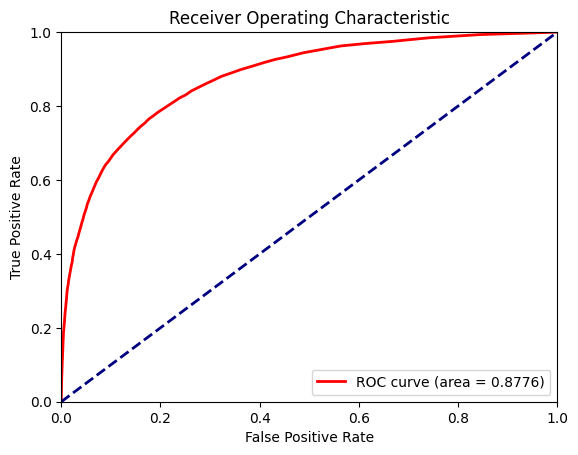

In [19]:

probabilities = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


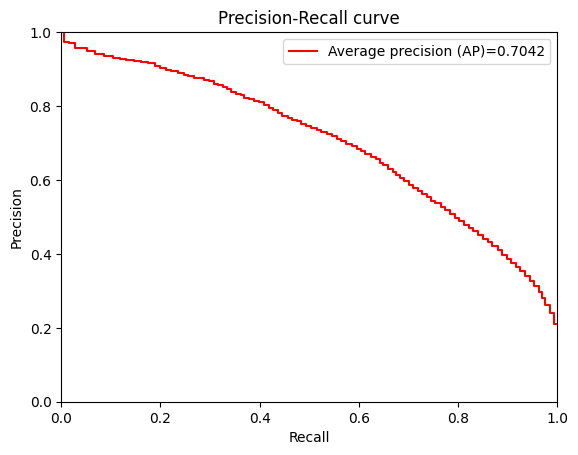

In [30]:
average_precision = average_precision_score(y_test, probabilities)

precision, recall, _ = precision_recall_curve(y_test, probabilities)

plt.figure()
plt.step(recall, precision, where='post',color='red', label=f'Average precision (AP)={average_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="upper right")
plt.show()


In [24]:
# Calculate the F1 score
f1 = f1_score(y_test, predictions)
f1

0.6181033767526757

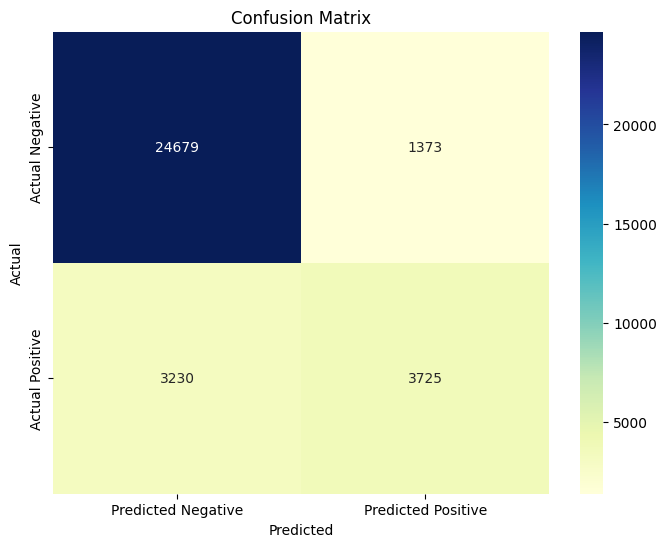

In [27]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [31]:

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, predictions)

# Calculate Sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Display the results
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'Sensitivity (True Positive Rate): {sensitivity}')
print(f'Specificity (True Negative Rate): {specificity}')


Matthews Correlation Coefficient: 0.5449285019931858
Sensitivity (True Positive Rate): 0.5355859094176851
Specificity (True Negative Rate): 0.9472977122677722
